# Проект в процессе доработки

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import ParameterGrid
from sklearn.utils import shuffle
from tqdm.notebook import tqdm
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1500)
warnings.simplefilter("ignore")

In [2]:
try:
    df_original = pd.read_csv('/DS/Yandex_Practikum/Projects/datasets/gold_recovery_full_new.csv')
except:
    df_original = pd.read_csv('/datasets/gold_recovery_full_new.csv')
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [3]:
try:
    df_test = pd.read_csv('/DS/Yandex_Practikum/Projects/datasets/gold_recovery_test_new.csv')
except:
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [4]:
try:
    df_train = pd.read_csv('/DS/Yandex_Practikum/Projects/datasets/gold_recovery_train_new.csv')
except:
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
df_train.loc[df_train['primary_cleaner.output.concentrate_sol'].isna()].head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
72,2016-01-18 02:00:00,4.537821,11.108789,4.964392,44.631736,72.825821,10.188482,1.410536,20.955075,2.238369,167.068597,12.009001,7.25,1.106190,6.346876,NaN,NaN,33.939208,14.464623,2.595068,8.285282,2.175427,1600.026961,-499.027108,1598.899033,-499.271032,1599.029653,-500.350350,1600.123785,-500.312615,44960.879378,3202.827344,3192.749494,2.510374,7.355083,2.892469,609.288428,64.262634,40.637758,7.261177,15.006824,7.493341,14.988413,7.502243,10.504703,7.451145,25.603770,18.785028,80.490217,4.807123,0.933264,20.662700,2.056461,1000.517881,-500.281385,1599.967985,-500.566184,1599.778321,-501.129662,1403.929724,-500.233309,1200.077323,-499.611883,1199.722091,-504.587045,12.713855,4.521709,10.618930,2.193209,27.944862,-500.206351,25.940298,-499.998019,25.043226,-501.753172,23.973076,-499.810448,14.064474,-551.573603,11.974107,-550.699412,10.028196,-500.331171,8.072443,-499.359611,11.973959,-600.580952
445,2016-02-05 00:00:00,9.913419,7.303278,NaN,43.483467,5.128833,10.246254,2.120942,15.929437,5.797123,61.785548,9.012200,8.17,1.340832,7.566748,NaN,NaN,36.96119

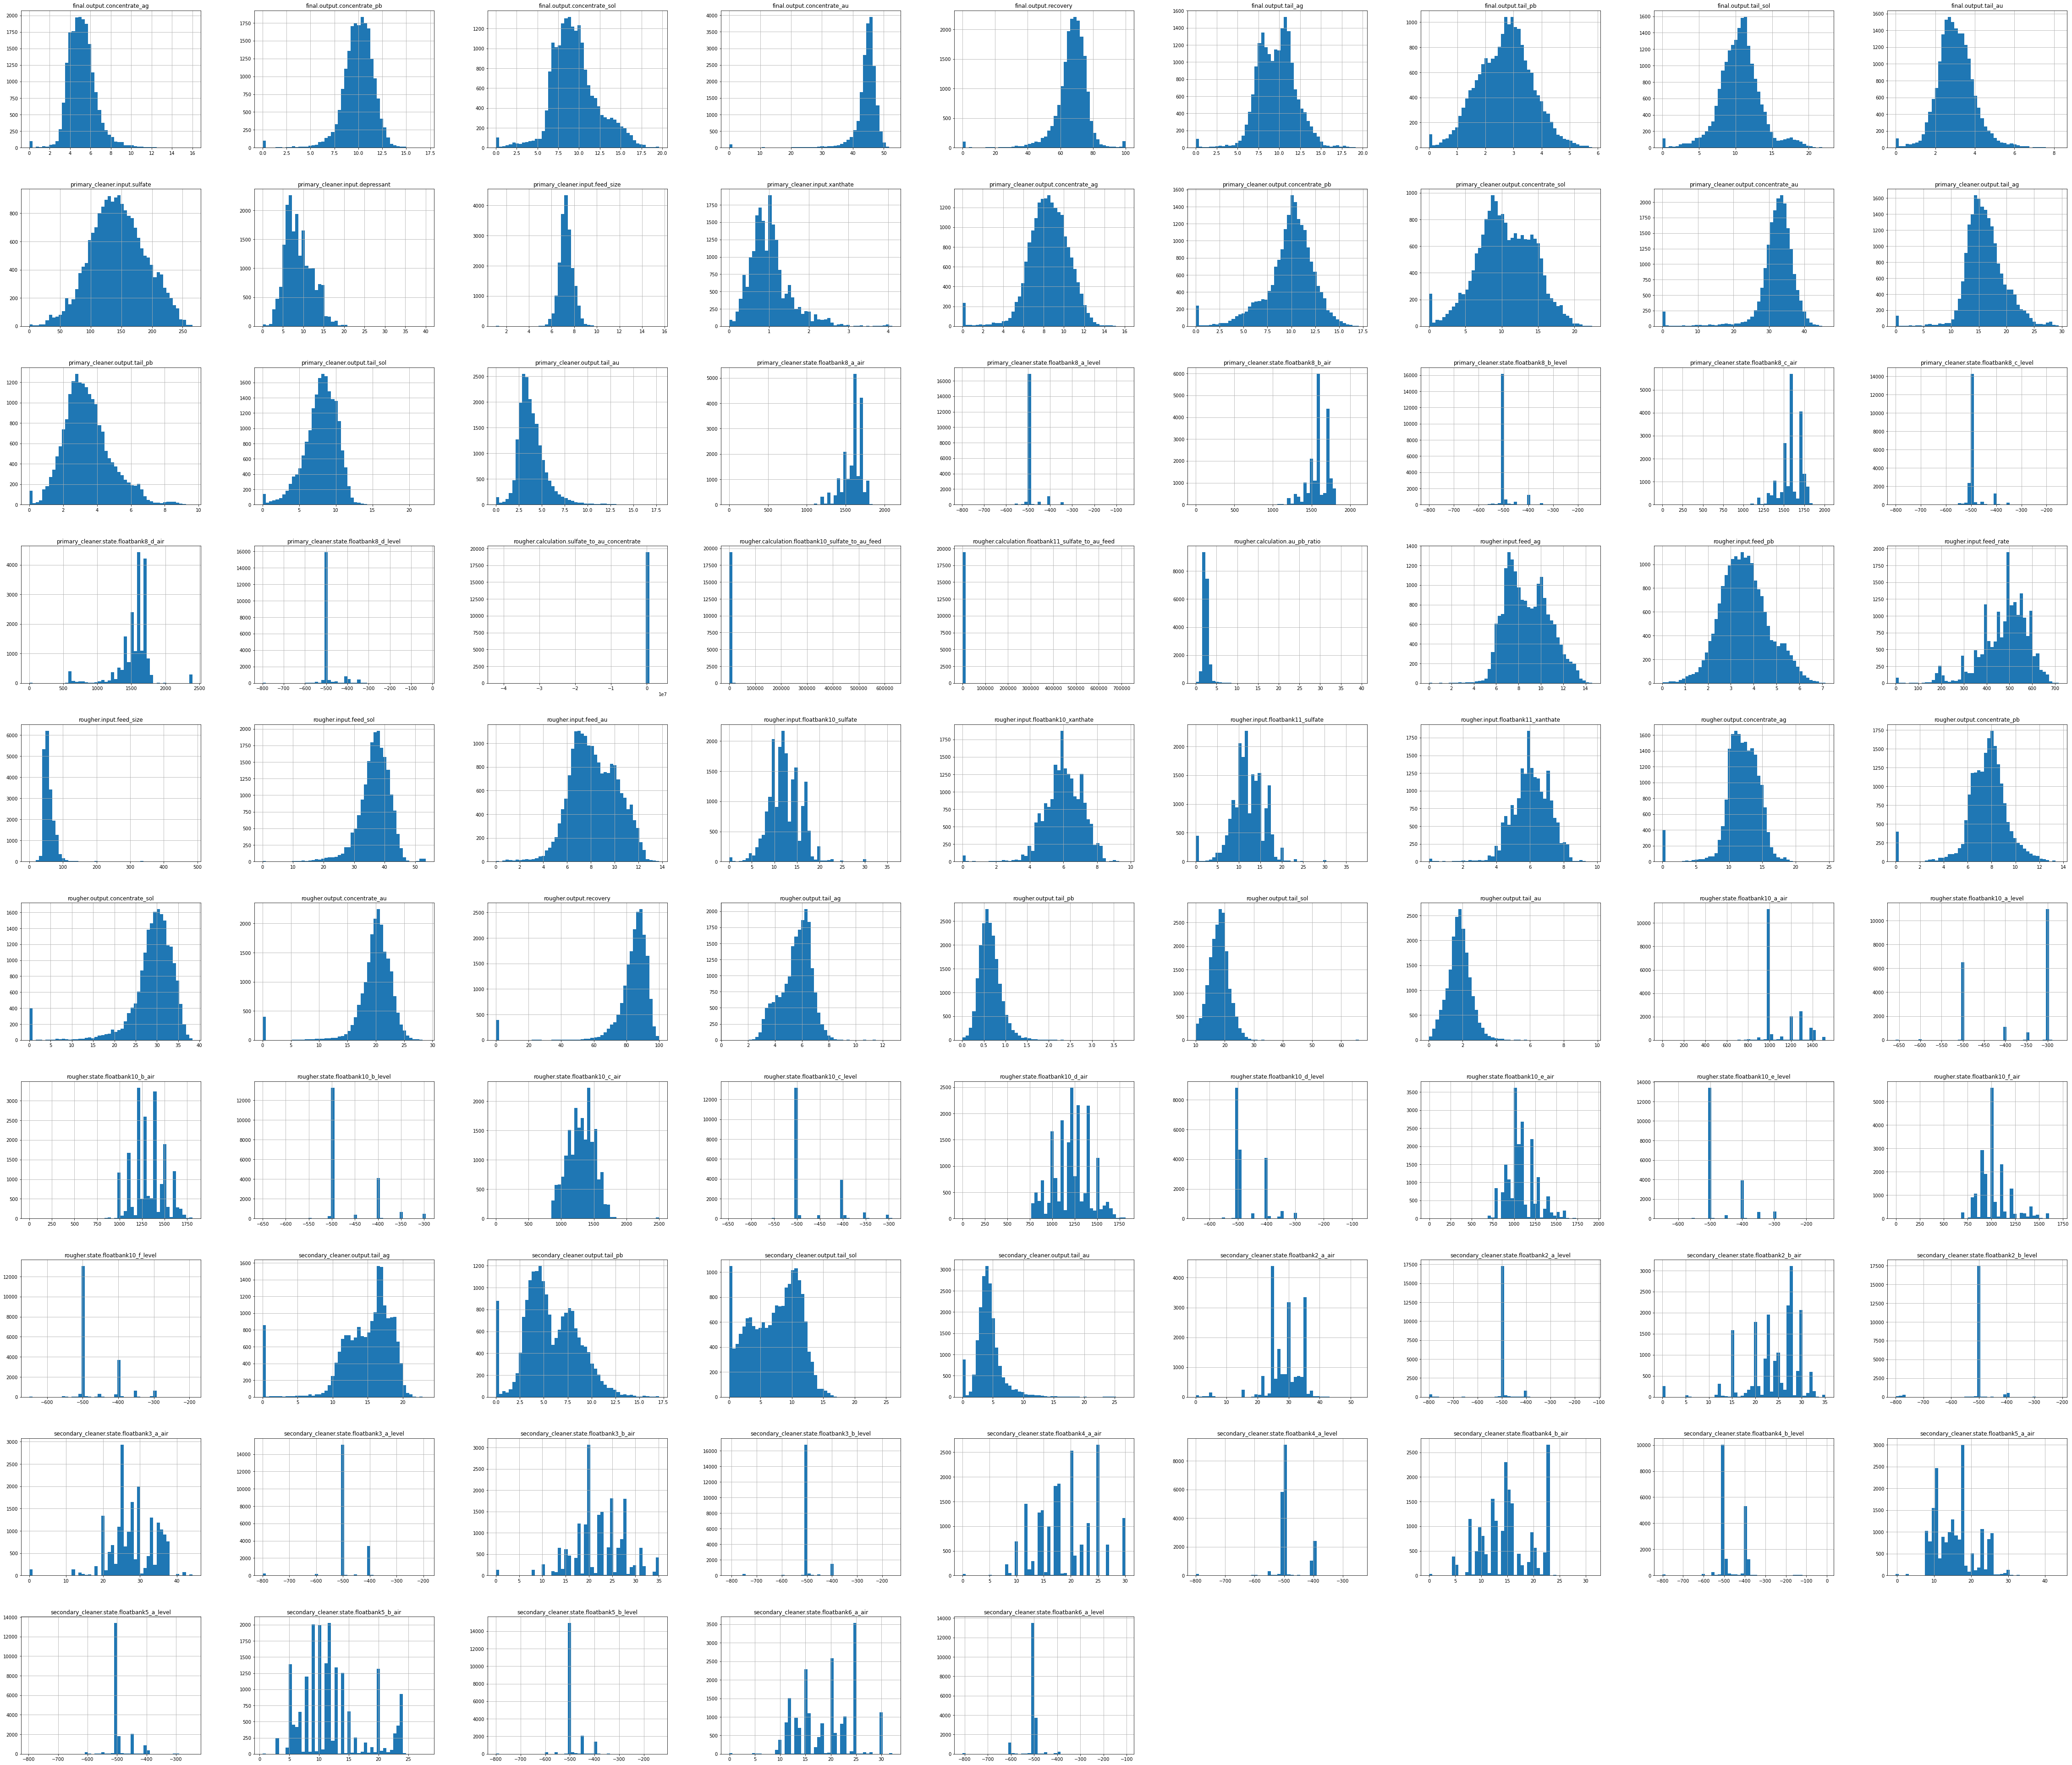

In [6]:
df_original.hist(bins = 50, figsize =(80,70))
None

## Анализ данных

### Проверка расчета rougher.output.recovery

In [7]:
STATE = np.random.RandomState(12345)

Проверью, что эффективность обогащения рассчитана правильно. Вычисляю её на обучающей выборке для признака rougher.output.recovery. Нахожу MAE между моими расчётами и значением признака.


In [8]:
recovery_df = df_train[['rougher.output.concentrate_au','rougher.input.feed_au','rougher.output.tail_au','rougher.output.recovery']]

In [9]:
recovery_df['recovery'] = (recovery_df['rougher.output.concentrate_au'] * (recovery_df['rougher.input.feed_au'] - recovery_df['rougher.output.tail_au'])) / \
    (recovery_df['rougher.input.feed_au'] * (recovery_df['rougher.output.concentrate_au'] - recovery_df['rougher.output.tail_au']))*100

In [10]:
mean_absolute_error(recovery_df['rougher.output.recovery'],recovery_df['recovery'])

9.73512347450521e-15

В результате проверки MAE между моим расчетным значением и значением признака составляет 1.3885438295121047e-16. Что говорит о праавильности расчета признака в данных.

### Признаки в недоступные в тестовой выборке

In [11]:
colum = []
for col in df_train.columns:
    if col not in df_test.columns:
        colum.append(col)
print(colum)

['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'rougher.output.tai

В тестовой выборке отсутствуют целевые признаки для обучения. Добавим в тестовоую выборки столбцы 'rougher.output.recovery', 'final.output.recovery' и удалим лишние столбцы из тренировочной выборки.

In [12]:
colum.remove("final.output.recovery")
colum.remove("rougher.output.recovery")

In [13]:
df_train = df_train.drop(columns = colum)

In [14]:
df_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

In [15]:
df_test = df_test.merge(df_original[['date','final.output.recovery', 'rougher.output.recovery', ]], how='left', on='date')

In [16]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,70.273583,89.993421
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,68.910432,88.089657
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,68.143213,88.412756
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.5

In [17]:
df_train.head()

,date,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.recovery,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,70.541216,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,87.107763,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,69.266198,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,1574.479259,-498.931665,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583,11.971193,6.005766,11.996163,6.012594,86.843261,1000.286398,-400.065196,1600.754587,-449.953435,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001,25.880539,-499.989656,23.889530,-500.372428,23.970550,-500.085473,22.085714,-499.446897,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,68.116445,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,1599.541515,-499.827444,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222,11.920603,6.197377,11.920305,6.204633,86.842308,999.719565,-400.074028,1599.337330,-450.008530,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147,26.005245,-499.929616,23.886657,-499.951928,23.913535,-499.442343,23.957717,-499.901982,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,68.347543,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,1600.449520,-500.052575,6.043309,2.037807,542.590390,57.792734,36.862241,6.118189,11.630094,6.203177,11.69245

Столбцы имеют одинаковое количество столбцов, можно приступать к предобработке

### Предобработка данных

#### Тестовая выборка

In [18]:
df_train.isna().sum().sort_values(ascending=False).head(15)

rougher.state.floatbank10_e_air             436
rougher.input.floatbank11_xanthate          428
secondary_cleaner.state.floatbank2_a_air    217
rougher.input.feed_size                     144
rougher.input.feed_pb                       100
primary_cleaner.input.xanthate              100
rougher.input.feed_sol                       78
rougher.input.floatbank11_sulfate            36
primary_cleaner.input.depressant             32
rougher.input.floatbank10_sulfate            29
secondary_cleaner.state.floatbank2_b_air     21
primary_cleaner.input.sulfate                20
rougher.input.feed_rate                       8
rougher.input.floatbank10_xanthate            8
secondary_cleaner.state.floatbank4_a_air      6
dtype: int64

In [19]:
df_test.isna().sum().sort_values(ascending=False).head(15)

rougher.input.floatbank11_xanthate            25
rougher.input.feed_sol                        21
secondary_cleaner.state.floatbank3_a_air       9
rougher.input.floatbank11_sulfate              8
primary_cleaner.input.depressant               5
rougher.input.floatbank10_sulfate              5
primary_cleaner.input.xanthate                 4
primary_cleaner.input.sulfate                  4
secondary_cleaner.state.floatbank2_a_air       3
rougher.input.feed_rate                        3
secondary_cleaner.state.floatbank2_b_air       2
rougher.input.feed_size                        1
secondary_cleaner.state.floatbank3_a_level     0
secondary_cleaner.state.floatbank3_b_level     0
secondary_cleaner.state.floatbank3_b_air       0
dtype: int64

Т.к. соседние данные похожи, то заменим пропуски и нули функцией fillna и методом ffill

In [20]:
df_original = df_original.replace(0,np.nan)
df_test = df_test.replace(0,np.nan)
df_train = df_train.replace(0,np.nan)

df_original = df_original.fillna(method = 'ffill')
df_test = df_test.fillna(method = 'ffill')
df_train = df_train.fillna(method = 'ffill')

### Анализ концентрации металлов на разных стадиях очистки

In [21]:
columns_metals = []
for col in df_original.columns[::-1]:
    if 'rougher.input.feed' in col:
        columns_metals.append(col)
print(columns_metals)

['rougher.input.feed_au', 'rougher.input.feed_sol', 'rougher.input.feed_size', 'rougher.input.feed_rate', 'rougher.input.feed_pb', 'rougher.input.feed_ag']


In [22]:
df_au = df_original[['rougher.input.feed_au','rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
df_ag = df_original[['rougher.input.feed_ag','rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
df_pb = df_original[['rougher.input.feed_pb','rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]

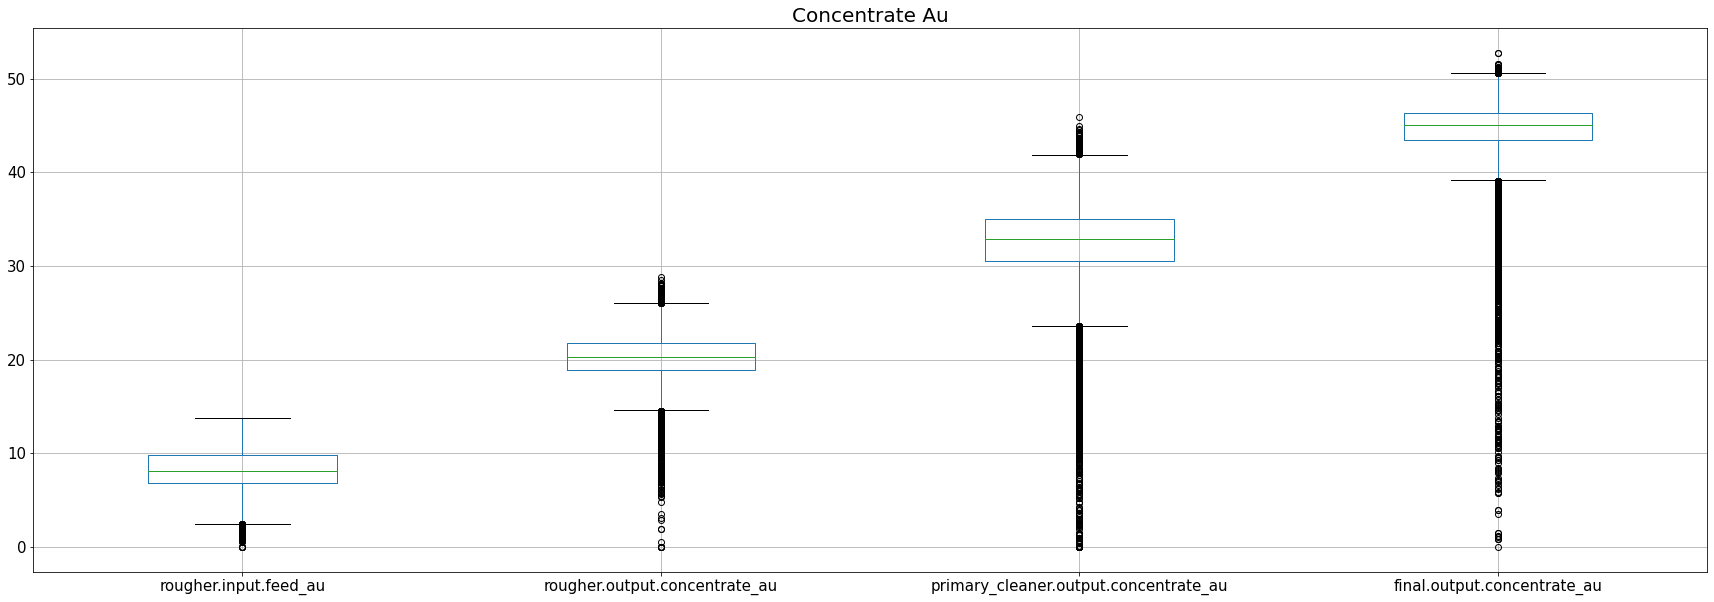

In [23]:
df_au.boxplot(figsize = (30,10), fontsize = 15)
plt.title('Concentrate Au', fontsize=20)
plt.show()

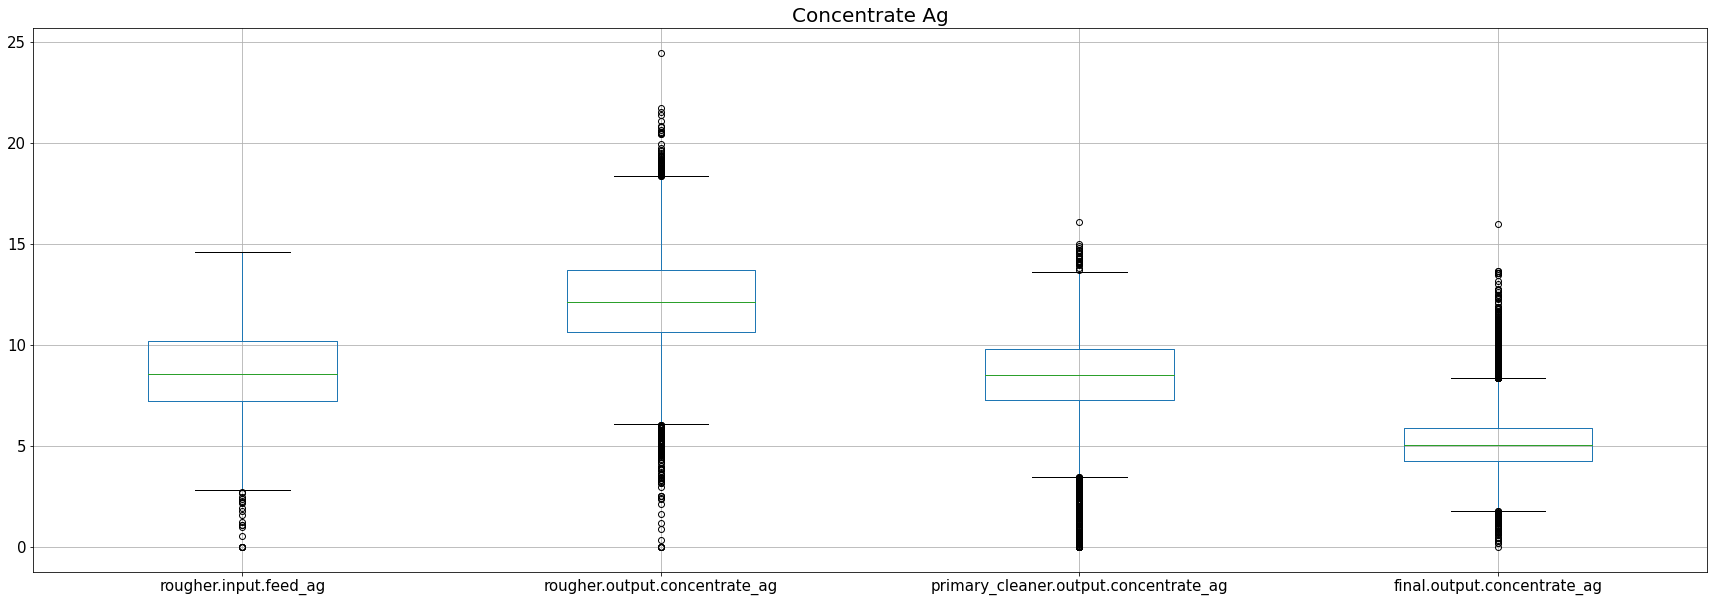

In [24]:
df_ag.boxplot(figsize = (30,10), fontsize = 15)
plt.title('Concentrate Ag', fontsize=20)
plt.show()

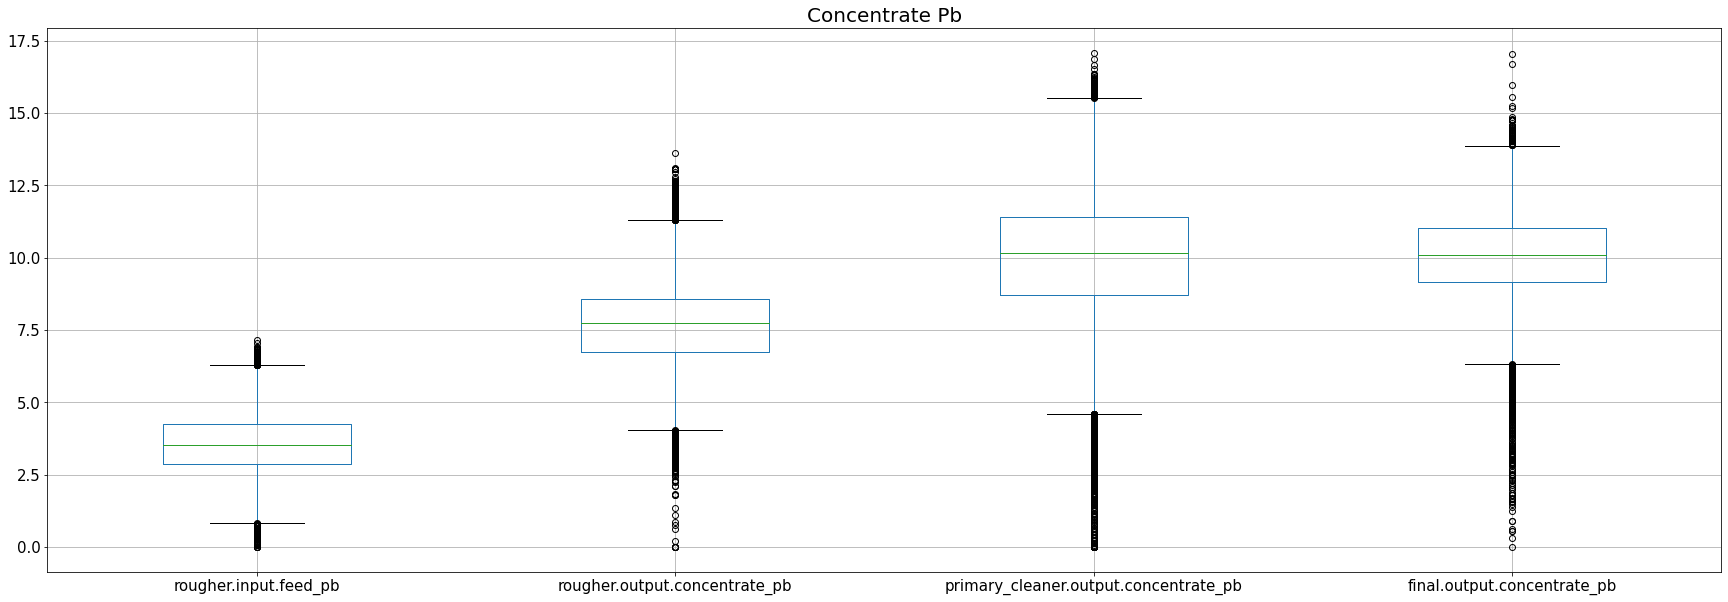

In [25]:
df_pb.boxplot(figsize = (30,10), fontsize = 15)
plt.title('Concentrate Pb', fontsize=20)
plt.show()

Итого: от этапа к этапу концентрация золота и свинца возрастает, концентрация серебра снижается.

### Размеры гранул сырья

In [26]:
columns_feed = []
for col in df_original.columns:
    if 'feed_size' in col:
        columns_feed.append(col)
print(columns_feed)

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']


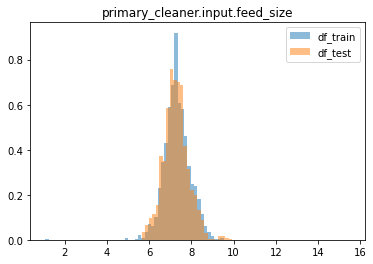

In [27]:
plt.hist(df_train[['primary_cleaner.input.feed_size']], bins = 60, label = 'df_train', density=True, alpha = 0.5)
plt.hist(df_test[['primary_cleaner.input.feed_size']], bins = 60, label = 'df_test', density=True, alpha = 0.5)
plt.legend(loc='upper right')
plt.title('primary_cleaner.input.feed_size')
plt.show()

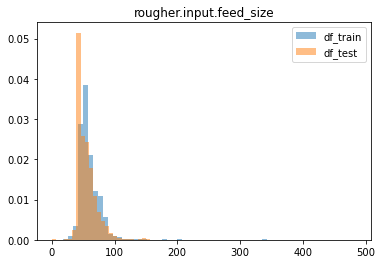

In [28]:
plt.hist(df_train[['rougher.input.feed_size']], bins = 60, label = 'df_train', density=True, alpha = 0.5)
plt.hist(df_test[['rougher.input.feed_size']], bins = 60, label = 'df_test', density=True, alpha = 0.5)
plt.legend(loc='upper right')
plt.title('rougher.input.feed_size')
plt.show()

Распределение размера гранул между тестовой и тренирововчной выборкой на этапах флотации и первого этапа очистки совпадает

### Суммарная концентрация всех веществ на разных стадиях

In [29]:
columns_metals = []
for col in df_original.columns[::-1]:
    if 'rougher.input.feed' in col:
        columns_metals.append(col)
print(columns_metals)

['rougher.input.feed_au', 'rougher.input.feed_sol', 'rougher.input.feed_size', 'rougher.input.feed_rate', 'rougher.input.feed_pb', 'rougher.input.feed_ag']


In [30]:
df_concentrate_train = pd.DataFrame()

In [31]:
def sum_concentrate(data):
    data_conc = pd.DataFrame()
    data_conc['rougher.feed'] = data[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb','rougher.input.feed_sol']].sum(axis=1)
    data_conc['rougher.output'] = data[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb','rougher.output.concentrate_sol']].sum(axis=1)
    data_conc['final.output'] = data[['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb','final.output.concentrate_sol']].sum(axis=1)
    return data_conc

In [32]:
df_train_sum_concentrate = sum_concentrate(df_original)

In [33]:
df_train_sum_concentrate

,rougher.feed,rougher.output,final.output
0,51.680034,66.424950,63.644396
1,50.659114,67.012710,63.957723
2,50.609929,66.103793,64.311180
3,51.061546,65.752751,63.573449
4,47.859163,65.908382,64.004667
...,...,...,...
19434,53.415050,70.781325,68.098589
19435,53.696482,70.539603,68.274362
19436,54.589604,55.376330,68.226068
19437,54.027355,69.201689,68.200449


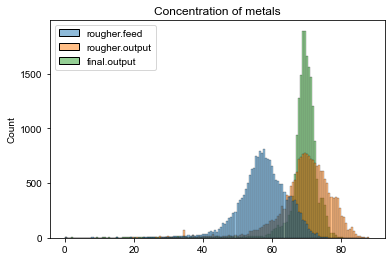

In [34]:
sns.histplot(data = df_train_sum_concentrate).set(title = 'Concentration of metals')
sns.set(rc={"figure.figsize":(25, 10)})
sns.set(font_scale=1.5)
plt.show()

## Модель

### Расчет для двух таргетов одновременно

In [35]:
def sMAPE(y_true,y_pred):
    rougher_true = pd.Series(y_true[:,1])
    rougher_pred= pd.Series(y_pred[:,1])
    final_true = pd.Series(y_true[:,0])
    final_pred= pd.Series(y_pred[:,0])
    smape_rougher = 1 / rougher_true.shape[0] * (abs(rougher_true - rougher_pred)/((abs(rougher_true) + abs(rougher_pred))/2)).sum()*100
    smape_final = 1 / rougher_true.shape[0] * (abs(final_true - final_pred)/((abs(final_true) + abs(final_pred))/2)).sum()*100
    smape_total = 0.25 * smape_rougher + 0.75 * smape_final
    return smape_total

In [36]:
my_scorer = make_scorer(sMAPE)

In [37]:
best_model = None
best_result = 100

In [38]:
df_train= shuffle(df_train, random_state=STATE)

In [39]:
target = df_train[['final.output.recovery','rougher.output.recovery']]
features = df_train.drop(['final.output.recovery','rougher.output.recovery','date'], axis=1)

In [40]:
target = target.to_numpy()
features = features.to_numpy()

Линейная регрессия

In [41]:
model = LinearRegression()
scores = cross_val_score(model, features, target, cv=5, scoring=my_scorer, error_score='raise', n_jobs= -1)
final_score = sum(scores) / len(scores)  
if best_result > final_score:
    best_result = final_score
    best_model = model 

In [42]:
print(best_model)
print(best_result)

LinearRegression()
7.337715052014691


Дерево решений регрессии

In [43]:
for depth in range(1, 20, 1):
    model = DecisionTreeRegressor(max_depth=depth, random_state=STATE)
    scores = cross_val_score(model, features, target, cv=5, scoring=my_scorer, error_score='raise', n_jobs= -1)
    final_score = sum(scores) / len(scores)  
    if best_result > final_score:
        best_result = final_score
        best_model = model 

In [44]:
print(best_model)
print(best_result)

DecisionTreeRegressor(max_depth=11,
                      random_state=RandomState(MT19937) at 0x247D9476840)
6.495242913915573


Случайный лес регрессии

In [45]:
param_grid = {'n_estimators': list(range(1, 25)), 'max_depth': list(range(1, 25))}
params = list(ParameterGrid(param_grid))
for param in tqdm(params):
    model = RandomForestRegressor(random_state=STATE, n_estimators=param['n_estimators'], max_depth=param['max_depth'])
    scores = cross_val_score(model, features, target, cv=5, scoring=my_scorer, error_score='raise', n_jobs= -1)
    final_score = sum(scores) / len(scores)  
    if best_result > final_score:
        best_result = final_score
        best_model = model  

  0%|          | 0/576 [00:00<?, ?it/s]

In [46]:
print(best_model)
print(best_result)

RandomForestRegressor(max_depth=23, n_estimators=24,
                      random_state=RandomState(MT19937) at 0x247D9476840)
5.009119820340892


In [47]:
smape_total_both_targets = best_result
best_model_both_targets = best_model

### Расчет для двух таргетов отдельно

In [48]:
def MAPE(y_true,y_pred):
    true = pd.Series(y_true)
    pred= pd.Series(y_pred)
    mape = 1 / true.shape[0] * (abs(true - pred)/((abs(true) + abs(pred))/2)).sum()*100
    return mape

In [49]:
my_scorer = make_scorer(MAPE)

In [50]:
target_final = df_train['final.output.recovery']
target_rougher = df_train['rougher.output.recovery']

In [51]:
target_final = target_final.to_numpy()
target_rougher = target_rougher.to_numpy()

#### Target - final.output.recovery

In [52]:
best_model = None
best_result = 100

Линейная регрессия

In [53]:
model = LinearRegression()
scores = cross_val_score(model, features, target_final, cv=5, scoring=my_scorer, error_score='raise', n_jobs= -1)
final_score = sum(scores) / len(scores)  
if best_result > final_score:
    best_result = final_score
    best_model = model 

Дерево решений регрессии

In [54]:
for depth in range(1, 20, 1):
    model = DecisionTreeRegressor(max_depth=depth, random_state=STATE)
    scores = cross_val_score(model, features, target_final, cv=5, scoring=my_scorer, error_score='raise', n_jobs= -1)
    final_score = sum(scores) / len(scores)  
    if best_result > final_score:
        best_result = final_score
        best_model = model 

In [55]:
print(best_model)
print(best_result)

DecisionTreeRegressor(max_depth=10,
                      random_state=RandomState(MT19937) at 0x247D9476840)
7.653715469945496


Случайный лес регрессии

In [56]:
param_grid = {'n_estimators': list(range(1, 25)), 'max_depth': list(range(1, 25))}
params = list(ParameterGrid(param_grid))
for param in tqdm(params):
    model = RandomForestRegressor(random_state=STATE, n_estimators=param['n_estimators'], max_depth=param['max_depth'])
    scores = cross_val_score(model, features, target_final, cv=5, scoring=my_scorer, error_score='raise', n_jobs= -1)
    final_score = sum(scores) / len(scores)  
    if best_result > final_score:
        best_result = final_score
        best_model = model  

  0%|          | 0/576 [00:00<?, ?it/s]

In [57]:
smape_final = best_result
print(best_model)
print(best_result)

RandomForestRegressor(max_depth=24, n_estimators=24,
                      random_state=RandomState(MT19937) at 0x247D9476840)
5.9438410540728395


In [58]:
best_model_final = best_model

#### Target - rougher.output.recovery

In [59]:
best_model = None
best_result = 100

Линейная регрессия

In [60]:
model = LinearRegression()
scores = cross_val_score(model, features, target_rougher, cv=5, scoring=my_scorer, error_score='raise', n_jobs= -1)
final_score = sum(scores) / len(scores)  
if best_result > final_score:
    best_result = final_score
    best_model = model 

Дерево решений регрессии

In [61]:
for depth in range(1, 20, 1):
    model = DecisionTreeRegressor(max_depth=depth, random_state=STATE)
    scores = cross_val_score(model, features, target_rougher, cv=5, scoring=my_scorer, error_score='raise', n_jobs= -1)
    final_score = sum(scores) / len(scores)  
    if best_result > final_score:
        best_result = final_score
        best_model = model 

Случайный лес регрессии

In [62]:
param_grid = {'n_estimators': list(range(1, 25)), 'max_depth': list(range(1, 25))}
params = list(ParameterGrid(param_grid))
for param in tqdm(params):
    model = RandomForestRegressor(random_state=STATE, n_estimators=param['n_estimators'], max_depth=param['max_depth'])
    scores = cross_val_score(model, features, target_rougher, cv=5, scoring=my_scorer, error_score='raise', n_jobs= -1)
    final_score = sum(scores) / len(scores)  
    if best_result > final_score:
        best_result = final_score
        best_model = model  

  0%|          | 0/576 [00:00<?, ?it/s]

In [63]:
smape_rougher = best_result
print(best_model)
print(best_result)

RandomForestRegressor(max_depth=24, n_estimators=24,
                      random_state=RandomState(MT19937) at 0x247D9476840)
2.691251677769223


In [64]:
best_model_rougher = best_model

In [65]:
smape_total_separate_targets = 0.25 * smape_rougher + 0.75 * smape_final

In [66]:
print('При использовании моделей для двух таргетов сразу лучшая модель:',best_model_both_targets,'\nЛучший результат метрики sMAPE:',smape_total_both_targets)

При использовании моделей для двух таргетов сразу лучшая модель: RandomForestRegressor(max_depth=23, n_estimators=24,
                      random_state=RandomState(MT19937) at 0x247D9476840) 
Лучший результат метрики sMAPE: 5.009119820340892


In [67]:
print('При использовании моделей для двух таргетов раздельно лучшая модель:\nДля таргета final.output.recovery',best_model_final,'\nДля таргета rougher.output.recovery',best_model_rougher,'\nЛучший результат метрики sMAPE:',smape_total_separate_targets)

При использовании моделей для двух таргетов раздельно лучшая модель:
Для таргета final.output.recovery RandomForestRegressor(max_depth=24, n_estimators=24,
                      random_state=RandomState(MT19937) at 0x247D9476840) 
Для таргета rougher.output.recovery RandomForestRegressor(max_depth=24, n_estimators=24,
                      random_state=RandomState(MT19937) at 0x247D9476840) 
Лучший результат метрики sMAPE: 5.130693709996935


### Проверка модели на тестовой выборке

#### Для двух таргетов отдельно

In [68]:
target_test_final = df_test['final.output.recovery']
target_test_rougher = df_test['rougher.output.recovery']
features_test = df_test.drop(['final.output.recovery','rougher.output.recovery','date'], axis=1)

In [69]:
target_test_final = target_test_final.to_numpy()
target_test_rougher = target_test_rougher.to_numpy()
features_test = features_test.to_numpy()

In [70]:
model = best_model_final
model.fit(features, target_final)
predicted_test = model.predict(features_test)
mape_test_final = MAPE(target_test_final,predicted_test)

In [71]:
mape_test_final

8.785239490858068

In [72]:
model = best_model_rougher
model.fit(features, target_rougher)
predicted_test = model.predict(features_test)
mape_test_rougher = MAPE(target_test_rougher,predicted_test)

In [73]:
mape_test_rougher

4.558935603467754

In [74]:
smape_test_total = 0.25 * mape_test_rougher + 0.75 * mape_test_final
print(smape_test_total)

7.728663519010489


In [75]:
print('Значение метрики на тестовой выборке составляет для двух таргетов отдельно',smape_test_total)

Значение метрики на тестовой выборке составляет для двух таргетов отдельно 7.728663519010489


#### Для двух таргетов вместе

In [76]:
target_test = df_test[['final.output.recovery','rougher.output.recovery']]

In [77]:
target_test = target_test.to_numpy()

In [78]:
model = best_model_both_targets

In [79]:
model.fit(features, target)
predicted_test = model.predict(features_test)
smape_test_both = sMAPE(target_test,predicted_test)

In [80]:
print('Значение метрики на тестовой выборке составляет для двух таргетов вместе',smape_test_both)

Значение метрики на тестовой выборке составляет для двух таргетов вместе 8.756078902064676


### Проверка модели на адекватность

In [81]:
model = DummyRegressor (strategy="mean")
model.fit(features, target_final)
mape_dummy_final = MAPE(target_test_final, model.predict(features_test))

In [82]:
mape_dummy_final

8.795435026048937

In [83]:
model.fit(features, target_rougher)
mape_dummy_rougher = MAPE(target_test_rougher, model.predict(features_test))

In [84]:
mape_dummy_rougher

5.4609469081871636

In [85]:
smape_dummy_total = 0.25 * mape_dummy_rougher + 0.75 * mape_dummy_final
print(smape_dummy_total)

7.961812996583494


In [89]:
print('Лучшие модели на тестовой выборке дали результат в sMAPE', smape_test_total,'для двух таргетов отдельно.\nДля таргета rougher:',best_model_rougher,\
    '\nДля таргета final:',best_model_final,'\nРезультат проверки модели DummyRegressor дал результат sMAPE',smape_dummy_total)

Лучшие модели на тестовой выборке дали результат в sMAPE 7.728663519010489 для двух таргетов отдельно.
Для таргета rougher: RandomForestRegressor(max_depth=24, n_estimators=24,
                      random_state=RandomState(MT19937) at 0x247D9476840) 
Для таргета final: RandomForestRegressor(max_depth=24, n_estimators=24,
                      random_state=RandomState(MT19937) at 0x247D9476840) 
Результат проверки модели DummyRegressor дал результат sMAPE 7.961812996583494


В результате проведенного исследования полученные модели дали результат лучше константной модели. Значит модели имеют место быть.

# Вывод

Лучший результат предсказания получился в результате предсказания двух таргетов отдельно моделями RandomForestRegressor(max_depth=24, n_estimators=24) для обоих таргетов с результирующим значением sMAPE 7.728663519010489